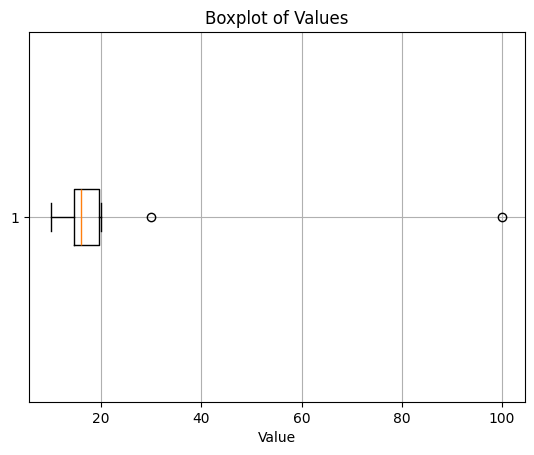

Outlier Detection Summary:
    Value   Z_Score  Z_Outlier  IQR_Outlier  Any_Outlier
0      10  0.592229      False        False        False
1      12  0.510285      False        False        False
2      14  0.428342      False        False        False
3      15  0.387370      False        False        False
4      15  0.387370      False        False        False
5      16  0.346398      False        False        False
6      18  0.264454      False        False        False
7      19  0.223483      False        False        False
8      20  0.182511      False        False        False
9      30  0.227207      False         True         True
10    100  3.095235       True         True         True


In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.


import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Value': [10, 12, 14, 15, 15, 16, 18, 19, 20, 30, 100]  # 30 and 100 are likely outliers
}
df = pd.DataFrame(data)

# 1. Z-score method
df['Z_Score'] = np.abs(stats.zscore(df['Value']))
z_threshold = 3
df['Z_Outlier'] = df['Z_Score'] > z_threshold

# 2. IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['IQR_Outlier'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# 3. Boxplot-based visual check
plt.boxplot(df['Value'], vert=False)
plt.title('Boxplot of Values')
plt.xlabel('Value')
plt.grid(True)
plt.show()

# Combine all results
df['Any_Outlier'] = df[['Z_Outlier', 'IQR_Outlier']].any(axis=1)

# Output the results
print("Outlier Detection Summary:")
print(df[['Value', 'Z_Score', 'Z_Outlier', 'IQR_Outlier', 'Any_Outlier']])
